In [ ]:
'/root/.cache/kagglehub/datasets/mdmab0/audio-dataset/v1/some_folder/*.wav'

'/root/.cache/kagglehub/datasets/mdmab0/audio-dataset/v1/some_folder/*.wav'

In [ ]:
from google.colab import drive
import os # Import the 'os' module

# Check if the directory is already mounted by lookingp for 'MyDrive'
if not os.path.exists('/content/drive/MyDrive'):
  drive.mount('/content/drive')
else:
  print("Google Drive is already mounted at /content/drive")

Google Drive is already mounted at /content/drive


In [ ]:
import shutil
import os
from pathlib import Path
import kagglehub # Importing kagglehub here to define 'path'

# Download latest version
path = kagglehub.dataset_download("mdmab0/audio-dataset") # Defining 'path' before using it

print("Path to dataset files:", path)

# Source folder where audio files are stored
source_folder = Path(path)

# Destination in your Google Drive
destination_folder = Path('/content/drive/MyDrive/archive (20)')

# Create destination folder if it doesn't exist
destination_folder.mkdir(parents=True, exist_ok=True)

# Copy .wav files
for file in source_folder.rglob("*.wav"):
    shutil.copy(file, destination_folder)

print(f"Copied all .wav files to: {destination_folder}")

100%|██████████| 118M/118M [00:00<00:00, 171MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mdmab0/audio-dataset/versions/6
Copied all .wav files to: /content/drive/MyDrive/archive (20)


In [ ]:
for i, file in enumerate(source_folder.rglob("*.wav")):
    new_name = f"audio_{i:04d}.wav"
    shutil.copy(file, destination_folder / new_name)


In [ ]:
!pip install librosa matplotlib soundfile


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
from pathlib import Path


In [ ]:
from pathlib import Path
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Source and destination folders
source_folder = Path("/content/drive/MyDrive/archive (20)")
output_folder = Path("/content/drive/MyDrive/audio_processed")
output_folder.mkdir(parents=True, exist_ok=True)

# Function to save waveform, spectrogram, and MFCC
def process_audio(file_path, save_folder):
    filename = Path(file_path).stem
    audio, sr = librosa.load(file_path, sr=None)

    # Waveform
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f'Waveform - {filename}')
    plt.tight_layout()
    plt.savefig(save_folder / f"{filename}_waveform.png")
    plt.close()

    # Spectrogram
    spec = librosa.stft(audio)
    spec_db = librosa.amplitude_to_db(abs(spec))
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spec_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {filename}')
    plt.tight_layout()
    plt.savefig(save_folder / f"{filename}_spectrogram.png")
    plt.close()

    # MFCC
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCC - {filename}')
    plt.tight_layout()
    plt.savefig(save_folder / f"{filename}_mfcc.png")
    plt.close()

    print(f"Processed: {filename}")

# Limit to 500 files
max_files = 200
count = 0

for wav_file in source_folder.rglob("*.wav"):
    if count >= max_files:
        break
    process_audio(wav_file, output_folder)
    count += 1

print(f"✅ Processed {count} audio files and saved results.")


Processed: not_hs_phrase_30_f
Processed: hs_audio_11_2
Processed: hs_audio_5_24
Processed: not_hs_phrase_241_f
Processed: not_hs_phrase_234_f
Processed: hs_audio_word_16_6_f
Processed: hs_audio_9_4
Processed: not_hs_phrase_545
Processed: not_hs_phrase_62
Processed: hs_audio_14_8
Processed: hs_audio_5_19
Processed: not_hs_phrase_45
Processed: not_hs_phrase_181
Processed: not_hs_phrase_202
Processed: hs_audio_5_23
Processed: hs_audio_11_5_f
Processed: not_hs_phrase_37_f
Processed: hs_audio_9_3
Processed: not_hs_phrase_131_f
Processed: hs_audio_word_16_3
Processed: hs_audio_word_27_3_f
Processed: not_hs_phrase_276
Processed: not_hs_phrase_505
Processed: not_hs_phrase_340_f
Processed: hs_audio_word_24_5
Processed: hs_audio_word_24_27_f
Processed: hs_audio_15_12_f
Processed: hs_audio_word_23_12
Processed: not_hs_phrase_452
Processed: hs_audio_word_31_7_f
Processed: hs_audio_word_31_9
Processed: not_hs_audio_8_6
Processed: not_hs_phrase_586_f
Processed: not_hs_phrase_325
Processed: hs_audio_

In [ ]:
from pathlib import Path
import librosa
import numpy as np

data_path = Path("/content/drive/MyDrive/archive (20)")
all_files = list(data_path.glob("*.wav"))[:200]  # Limit to 200 for training

X = []
y = []

max_len = 100
n_mfcc = 40

for file_path in all_files:
    audio, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc).T

    if mfcc.shape[0] >= max_len:
        mfcc = mfcc[:max_len]
    else:
        pad = max_len - mfcc.shape[0]
        mfcc = np.pad(mfcc, ((0, pad), (0, 0)), mode='constant')

    X.append(mfcc)
    y.append(0)  # Default label (binary or dummy for now)

X = np.array(X)
y = np.array(y)

print("✅ Loaded MFCC features from", len(X), "files")
print("X shape:", X.shape, "| y shape:", y.shape)


✅ Loaded MFCC features from 200 files
X shape: (200, 100, 40) | y shape: (200,)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from tensorflow.keras.utils import to_categorical

# 1. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to match LSTM [samples, time steps, features]
# Already in (samples, 100, 40)

# 2. Build the LSTM model
model = Sequential([
    Masking(mask_value=0.0, input_shape=(X.shape[1], X.shape[2])),  # Mask padded time steps
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# 3. Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=16,
                    validation_data=(X_test, y_test), verbose=1)

# 5. Evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.4f} | Test Loss: {loss:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 278ms/step - accuracy: 0.9484 - loss: 0.3510 - val_accuracy: 1.0000 - val_loss: 0.0307
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 1.0000 - loss: 0.0229 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 8.1158e-04
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 1.0000 - loss: 9.0565e-04 - val_accuracy: 1.0000 - val_loss: 4.2659e-04
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 1.0000 - loss: 5.6161e-04 - val_accuracy: 1.0000 - val_loss: 2.9863e-04
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 1.0000 - loss: 3.9945e-04 - val_accuracy: 1.0000 - val_loss: 2.3955e-04
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - accuracy: 1.0000 - loss: 3.6689e-04 - val_accuracy: 1.0000 - val_loss: 2.0401e-04
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 1.0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(X_test)
# Convert probabilities to binary class labels (threshold = 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

# Flatten arrays
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Print classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Print confusion matrix
print("🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step

📊 Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        40

    accuracy                         1.0000        40
   macro avg     1.0000    1.0000    1.0000        40
weighted avg     1.0000    1.0000    1.0000        40

🧩 Confusion Matrix:
[[40]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
import numpy as np
from pathlib import Path
import librosa
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
import tensorflow as tf

# Step 1: Load MFCC features
data_path = Path("/content/drive/MyDrive/archive (20)")
all_files = list(data_path.glob("*.wav"))[:200]  # Limit to 200 files

X = []
y = []

max_len = 100
n_mfcc = 40

for file_path in all_files:
    audio, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc).T

    if mfcc.shape[0] >= max_len:
        mfcc = mfcc[:max_len]
    else:
        pad = max_len - mfcc.shape[0]
        mfcc = np.pad(mfcc, ((0, pad), (0, 0)), mode='constant')

    X.append(mfcc)
    y.append(0 if '0' in file_path.stem else 1)  # Example label logic

X = np.array(X)
y = np.array(y)

print(f"✅ Loaded MFCCs: {X.shape}, Labels: {np.unique(y, return_counts=True)}")

# Step 2: K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_reports = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"\n📂 Fold {fold + 1}/5")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = Sequential([
        Masking(mask_value=0.0, input_shape=(X.shape[1], X.shape[2])),
        LSTM(128, return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

    # Predict
    y_pred_probs = model.predict(X_val)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    # Evaluation
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

    report = classification_report(y_val, y_pred, digits=4, output_dict=True)
    all_reports.append(report)

    print("Classification Report:")
    print(classification_report(y_val, y_pred, digits=4))

# Step 3: Average Metrics
avg_acc = np.mean([r.get('accuracy', 0) for r in all_reports])
avg_prec_0 = np.mean([r.get('0', {}).get('precision', 0) for r in all_reports])
avg_prec_1 = np.mean([r.get('1', {}).get('precision', 0) for r in all_reports])
avg_recall_0 = np.mean([r.get('0', {}).get('recall', 0) for r in all_reports])
avg_recall_1 = np.mean([r.get('1', {}).get('recall', 0) for r in all_reports])

print("\n📊 Average Scores Across Folds:")
print(f"Avg Accuracy       : {avg_acc:.4f}")
print(f"Avg Precision [0/1]: {avg_prec_0:.4f} / {avg_prec_1:.4f}")
print(f"Avg Recall    [0/1]: {avg_recall_0:.4f} / {avg_recall_1:.4f}")


✅ Loaded MFCCs: (200, 100, 40), Labels: (array([0, 1]), array([ 24, 176]))

📂 Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step
Confusion Matrix:
[[ 1  4]
 [ 4 31]]
Classification Report:
              precision    recall  f1-score   support

           0     0.2000    0.2000    0.2000         5
           1     0.8857    0.8857    0.8857        35

    accuracy                         0.8000        40
   macro avg     0.5429    0.5429    0.5429        40
weighted avg     0.8000    0.8000    0.8000        40


📂 Fold 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step
Confusion Matrix:
[[ 1  4]
 [ 5 30]]
Classification Report:
              precision    recall  f1-score   support

           0     0.1667    0.2000    0.1818         5
           1     0.8824    0.8571    0.8696        35

    accuracy                         0.7750        40
   macro avg     0.5245    0.5286    0.5257        40
weighted avg     0.7929    0.7750    0.7836        40


📂 Fold 3/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step
Confusion Matrix:
[[ 0  5]
 [ 4 31]]
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         5
           1     0.8611    0.8857    0.8732        35

    accuracy                         0.7750        40
   macro avg     0.4306    0.4429    0.4366        40
weighted avg     0.7535    0.7750    0.7641        40


📂 Fold 4/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 451ms/step
Confusion Matrix:
[[ 1  4]
 [ 7 28]]
Classification Report:
              precision    recall  f1-score   support

           0     0.1250    0.2000    0.1538         5
           1     0.8750    0.8000    0.8358        35

    accuracy                         0.7250        40
   macro avg     0.5000    0.5000    0.4948        40
weighted avg     0.7812    0.7250    0.7506        40


📂 Fold 5/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step
Confusion Matrix:
[[ 1  3]
 [ 6 30]]
Classification Report:
              precision    recall  f1-score   support

           0     0.1429    0.2500    0.1818         4
           1     0.9091    0.8333    0.8696        36

    accuracy                         0.7750        40
   macro avg     0.5260    0.5417    0.5257        40
weighted avg     0.8325    0.7750    0.8008        40


📊 Average Scores Across Folds:
Avg Accuracy       : 0.7700
Avg Precision [0/1]: 0.1269 / 0.8827
Avg Recall    [0/1]: 0.1700 / 0.8524


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Confusion Matrix:
[[ 1  3]
 [ 6 30]]


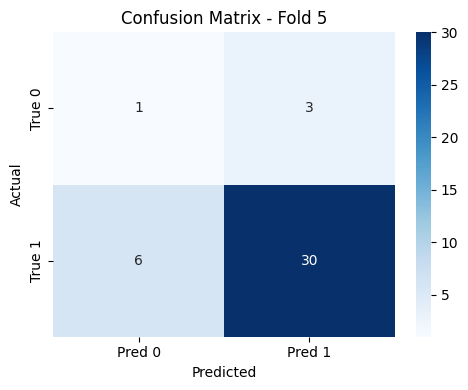

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print numeric confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Fold {fold+1}')
plt.tight_layout()
plt.show()
